In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
true_df = pd.read_csv('data.csv')

In [3]:
true_df.shape

(32, 6)

In [4]:
pred_df = pd.read_csv('output.csv')


In [5]:
pred_df.shape

(56, 6)

In [6]:
def process_statement_text(text):
        if isinstance(text, str) and text.endswith('.'):
            return text[:-1]
        text = text.replace('"', '')
        return text
    

true_df["statement_text_processed"] = true_df["statement_text"].apply(process_statement_text)
pred_df["statement_text_processed"] = pred_df["statement_text"].apply(process_statement_text)

true_df["outcome_measure_processed"] = true_df["outcome measure"].apply(lambda x: x.lower())
pred_df["outcome_measure_processed"] = pred_df["outcome_measure"].apply(lambda x: x.lower())

In [7]:
comparison_df = pd.merge(
    true_df, 
    pred_df, 
    left_on="statement_text_processed", 
    right_on="statement_text_processed",
)

In [8]:
comparison_df.head()

,name_x,statement_text_x,section_level_0_x,section_level_1_x,section_level_2_x,outcome measure,statement_text_processed,outcome_measure_processed_x,name_y,statement_text_y,section_level_0_y,section_level_1_y,section_level_2_y,outcome_measure,outcome_measure_processed_y
0,input\Prot_000,The primary objective of the study is to compa...,objectives-endpoints-section,primary-objective,efficacy-objective,PFS,The primary objective of the study is to compa...,pfs,input\Prot_000,The primary objective of the study is to compa...,objectives-endpoints-section,primary-objective,efficacy-objective,PFS,pfs
1,input\Prot_000,"PFS, as assessed by the BIRC, per Response Eva...",objectives-endpoints-section,primary-objective,efficacy-objective,PFS,"PFS, as assessed by the BIRC, per Response Eva...",pfs,input\Prot_000,"PFS, as assessed by the BIRC, per Response Eva...",objectives-endpoints-section,primary-objective,efficacy-objective,PFS,pfs
2,input\Prot_000,To compare the efficacy of brigatinib to that ...,objectives-endpoints-section,secondary-objective,efficacy-objective,"Disease control rate (DCR), Overall Survival (OS)",To compare the efficacy of brigatinib to that ...,"disease control rate (dcr), overall survival (os)",input\Prot_000,To compare the efficacy of brigatinib to that ...,objectives-endpoints-section,secondary-objective,efficacy-objective,"ORR, DCR, OS","orr, dcr, os"
3,input\Prot_000,To compare the efficacy in the CNS of brigatin...,objectives-endpoints-section,secondary-objective,efficacy-objective,PFS,To compare the efficacy in the CNS of brigatin...,pfs,input\Prot_000,To compare the efficacy in the CNS of brigatin...,objectives-endpoints-section,secondary-objective,efficacy-objective,"intracranial response, intracranial PFS","intracranial response, intracranial pfs"
4,input\Prot_000,To assess patient-reported symptoms and health...,objectives-endpoints-section,secondary-objective,efficacy-objective,Quality of life,To assess patient-reported symptoms and health...,quality of life,input\Prot_000,To assess patient-reported symptoms and health...,objectives-endpoints-section,secondary-objective,efficacy-objective,Quality of Life,quality of life


### Statement Text Extraction

In [9]:
true_df["name"].value_counts()

name
input\Prot_000    18
input\Prot_001     8
input\Prot_002     6
Name: count, dtype: int64

In [10]:
pred_df["name"].value_counts()

name
input\Prot_000    26
input\Prot_002    20
input\Prot_001    10
Name: count, dtype: int64

In [11]:
TP = comparison_df.shape[0]
FP = pred_df.shape[0] - TP
FN = true_df.shape[0] - TP

In [12]:
### Precision = TP / (TP + FP)
precision = TP / (TP + FP)
precision

0.375

In [13]:
### Recall = TP / (TP + FN)
recall = TP / (TP + FN)
recall

0.65625

In [14]:
### Accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy = (TP + 0) / (TP + 0 + FP + FN)
accuracy

0.31343283582089554

## Classification Evaluation

In [15]:
def generate_metrics(y_true, y_pred):

    labels = np.unique(np.concatenate([y_true, y_pred]))

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro', zero_division=1)
    recall = recall_score(y_true, y_pred, average='macro', zero_division=1)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")

    cm = confusion_matrix(list(y_true), list(y_pred), labels=labels)

    plt.figure(figsize=(10, 7))

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=labels, 
                yticklabels=labels)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

### Section Level 1 Classification

In [16]:
true_df["section_level_1"].value_counts()

section_level_1
secondary-objective      18
primary-objective        10
exploratory-objective     4
Name: count, dtype: int64

In [17]:
pred_df["section_level_1"].value_counts()

section_level_1
secondary-objective      41
primary-objective        13
exploratory-objective     2
Name: count, dtype: int64

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


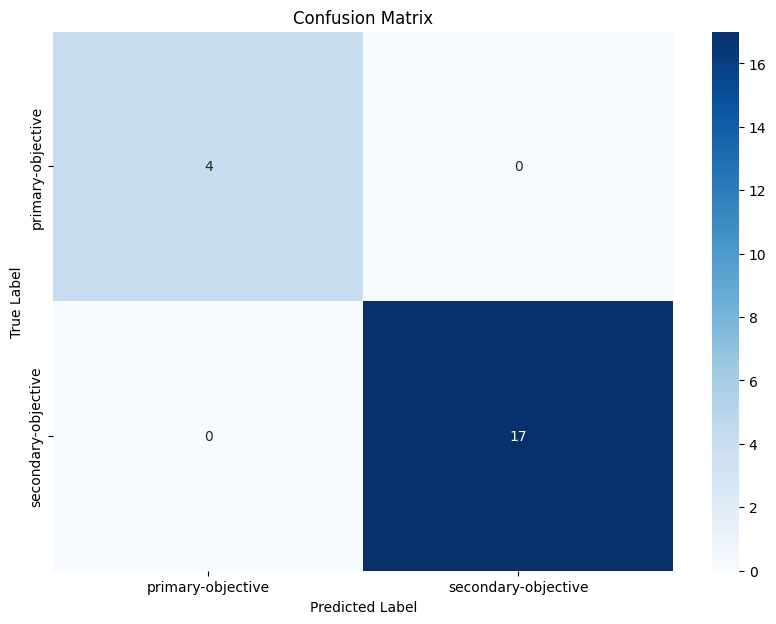

In [18]:
# Calculate metrics

y_true = comparison_df["section_level_1_x"].values
y_pred = comparison_df["section_level_1_y"].values

generate_metrics(y_true, y_pred)

### Section Level 2 Classification

In [19]:
true_df["section_level_2"].value_counts()

section_level_2
efficacy-objective                   25
safety-and-tolerability-objective     3
pharmacokinetic-objective             3
Name: count, dtype: int64

In [20]:
pred_df["section_level_2"].value_counts()

section_level_2
efficacy-objective                   45
safety-and-tolerability-objective     7
pharmacokinetic-objective             4
Name: count, dtype: int64

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


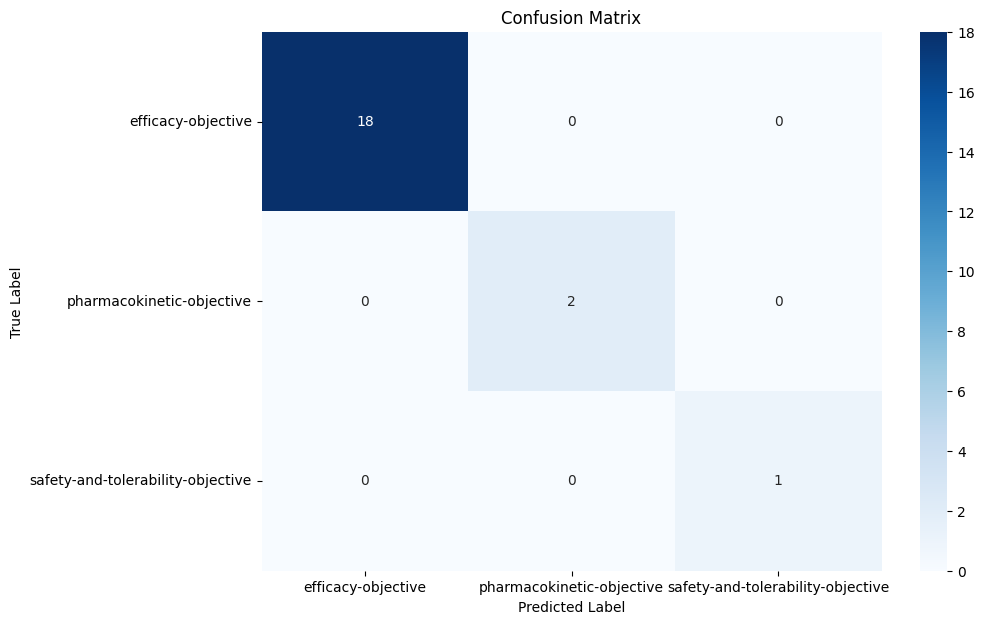

In [21]:
# Calculate metrics

y_true = comparison_df["section_level_2_x"].values
y_pred = comparison_df["section_level_2_y"].values

generate_metrics(y_true, y_pred)

### Outcome Meassure Extraction

Accuracy: 0.5714285714285714
Precision: 0.6333333333333333
Recall: 0.7266666666666667


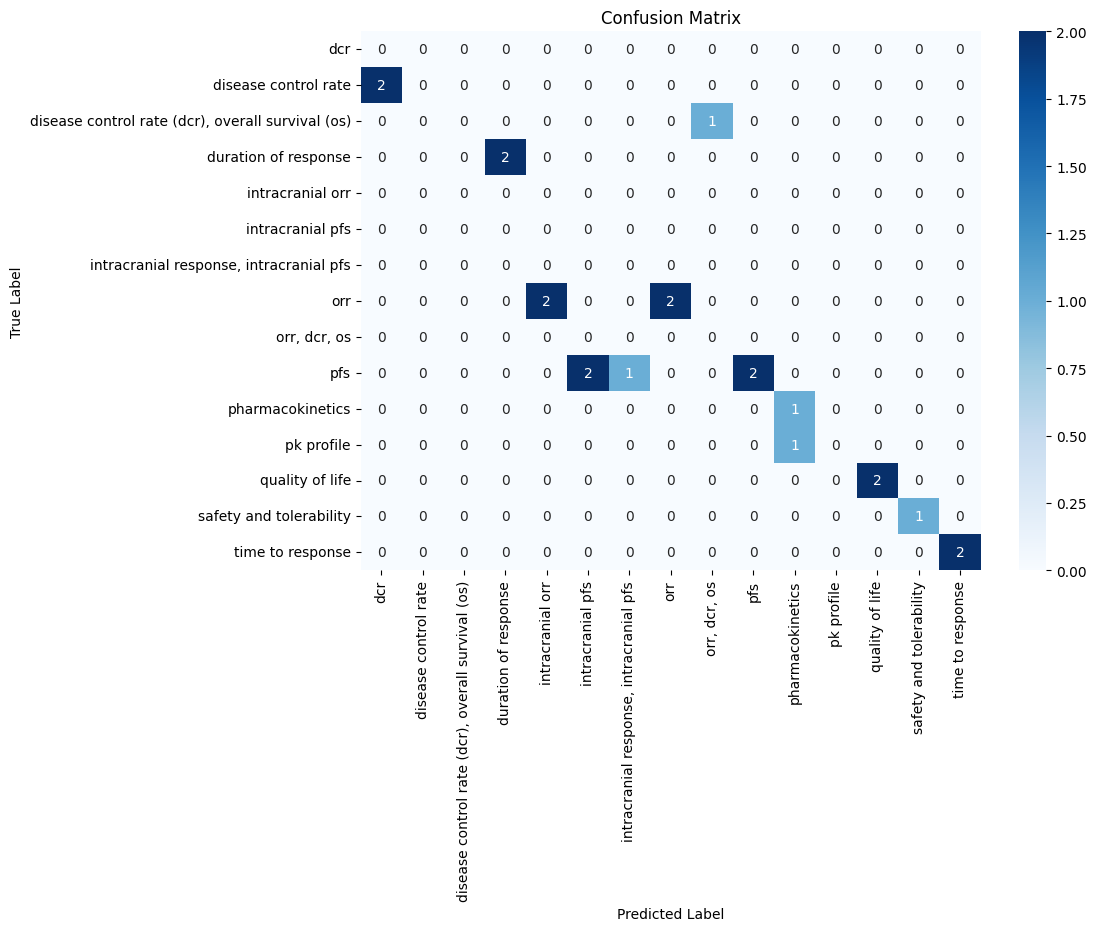

In [22]:
# Calculate metrics

y_true = comparison_df["outcome_measure_processed_x"].values
y_pred = comparison_df["outcome_measure_processed_y"].values

generate_metrics(y_true, y_pred)

## Torch Model Evaluation

In [23]:
test_df = pd.read_csv("test_data.csv")

In [24]:
y_true = test_df["label"].values
y_pred = test_df["y_pred"].values

Accuracy: 0.75
Precision: 0.9166666666666666
Recall: 0.3333333333333333


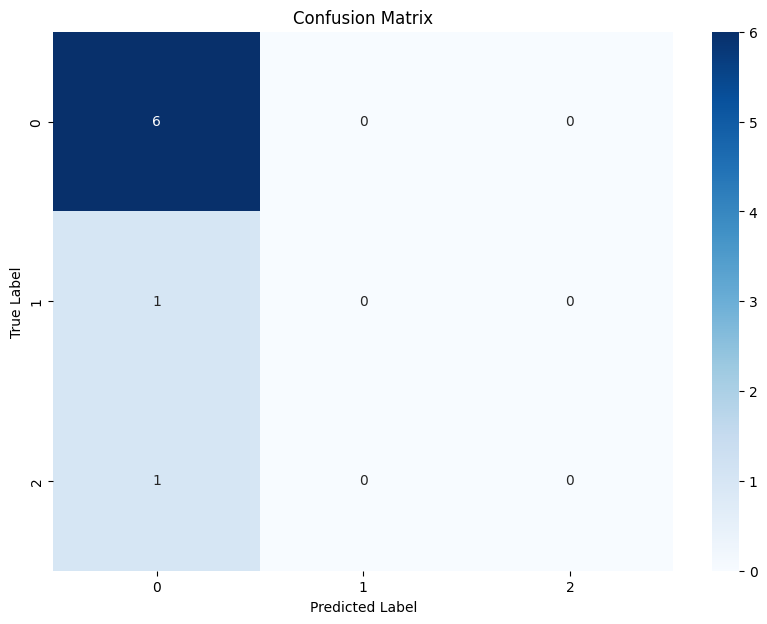

In [25]:
generate_metrics(y_true, y_pred)